# Simulation of Brownian Motion using Random Walks

# Abstract

The objective of the following project was to be able to find patterns arising in random walks in one and two dimensions. Namely, it was done to experimentally verify the existence of diffusive behavior present in a basic random walk algorithm in two dimensions, and the existence of a gaussian distribution for the one dimensional random walk algorithm. This essentially indicates that Brownian-esque motion can be generated without the need to explicitly codify its dynamics, and that one could get a fairly good approximation for a Brownian Motion simulation using a random walk algorithm for large enough time steps. For us to conclude the presence of diffusive behavior we need to find that $\left<R^2\right>$, the mean square distance is proportional to $L$, the amount of steps given, i.e., that $\left<R^2\right> = kL$, where k is a constant value.

Eventually I found the behavior of the distance distribution for the 1D walk to coincide with a gaussian distance without the presence of an explicit gaussian distribution on the code. Likewise, I found the proportionality constante for $\left<R^2\right>$, which is $k \approx 0.01454$, so we obtain $\left<R^2\right> = 0.01454 L$ to be the empirical formula that relates the mean square distance of the random walk with the amount of steps it took.

# Physical System and Model

## Brownian Motion

Brownian Motion is described as a type of motion found in particles, present in small scales and arising as the consequence of collisions of said particles between each other, with no preferred direction. Einstein's work in Brownian motion related the diffussion coefficient to observable quantities and showed that it is related to the mean squared displacement of the particle [2]. Further research allowed to conclude that Brownian motion can be modeled using random walks [3].

## Lattice Random Walk

## In one Dimension

It can be proven that one dimensional random walks present a gaussian distribution, i.e. a dsitribution of the form $f(x) = A \exp{\frac{(x-\mu)^2}{2\sigma^2}}$ where $\mu, \sigma$ are the regular mean and standard deviation of the distribution, and A is a normalization constant.

## In two Dimensions

Accodring to Rycroft and Bazant the two dimensional case, however, should present a Rayleigh Distribution, of the form $f(r) = \frac{2r}{N} \exp{(-r^2/N)}$, so a directly proportional relationship between the mean value of $R^2$ and the amount of steps given $L$, such that:

$$\left<R^2\right> \propto {L}$$

A trait the algorithm shares with phenomena that are diffusive in nature [2]. Therefore, we can experimentally check for both the gaussian distribution present in the 1D case and the previously defined relationship to hold for increasingly bigger N. What is expected to happen is for $\frac{\left<R^2\right>}{L} = K$, for a constant $K$ we are expected to extract.

# Algorithms

The basic random walk algorithm used consists on the following routines:

1. Obtain an initial configuration (buy default it's the origin).
2. Move the system a given amount left or right, i.e. sum or substract the current position of the "particle" an amount a (by default a=1) with probability p.
3. Repeat step 2 $L-1$ more times.

This is assumed to be independent for $x, y \in \mathbb{R}^2$ so this happens concurrently for both coordinates.

Also, to improve performance, I used the approximation:

\begin{align}
\langle O\rangle_{n+1} = \frac{1}{n+1}\Bigl(O\bigl(\{s_i\}_{n+1}\bigr) +n\langle O\rangle_{n}\Bigr)
\end{align}

For the observable ${R^2} \equiv O(\{s_i\}_n)$.


For this experiment $P \equiv 0.5$ by default

# Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

rd.seed(1550)
def mov(L, p = 0.5, a = 0, b = 0):

    x = [a]
    y = [b]
    r = 0
    dx, dy = 0, 0
    if p>1:
        return "No uses eso como probabilidad"
    for j in range(L):
        rx = round(rd.random(),2)
        ry = round(rd.random(),2)

        if rx <= p:
            dx = 1

        else:
            dx = -1

        if ry <= p:
            dy = 1
        else:
            dy = -1
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)

    r= np.sqrt(((x[-1]-a)**2 + (y[-1]-b)**2))
    return x, y, r

# Results

## 1D Random walk

The following data was collected from experiments at $L = \{2000,5000,7000,8000\}$ steps after $N = 5000$ repetitions per experiment, since bigger sample sizes tend to be a huge burden on the computer used for this project:

### Distribution for $L = 2000$

In [2]:
L = 2000
X, Y, r = mov(L)

In [3]:
n = 5000
N = [i for i in range(1,n)]
rt = []
rt2 = []
for _ in N:
  rt2.append(mov(L)[0][-1])

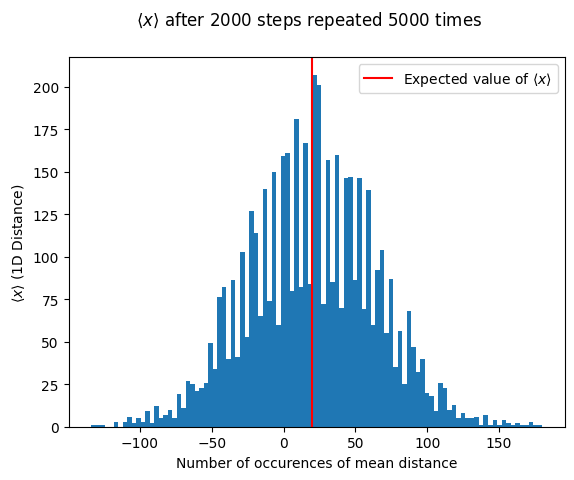

In [4]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Number of occurences of mean distance")
ax.hist(rt2, bins = 100)
ax.set_ylabel(r"$\left<x\right>$ (1D Distance)")
ax.axvline(x=np.mean(rt2), color="red", label = r"Expected value of $\left<x\right>$")
fig.suptitle(r"$\left<x\right>$ after "+str(L)+" steps repeated "+str(n)+" times")
ax.legend()


plt.show()

### Distribution for $L = 5000$

In [5]:
L = 5000
X, Y, r = mov(L)

In [6]:

rt = []
rt2 = []
for _ in N:
  rt2.append(mov(L)[0][-1])

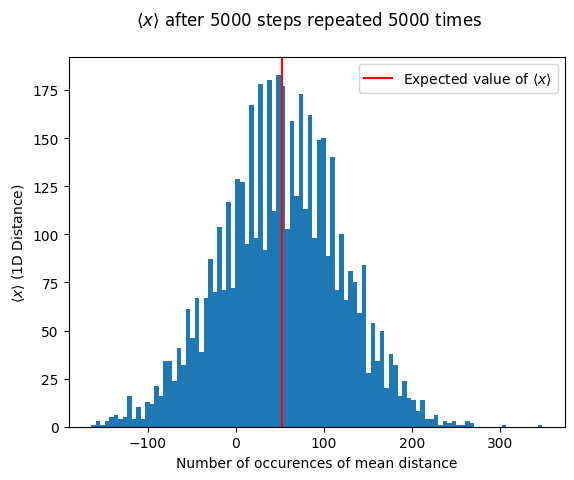

In [7]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Number of occurences of mean distance")
ax.hist(rt2, bins = 100)
ax.set_ylabel(r"$\left<x\right>$ (1D Distance)")
ax.axvline(x=np.mean(rt2), color="red", label = r"Expected value of $\left<x\right>$")
fig.suptitle(r"$\left<x\right>$ after "+str(L)+" steps repeated "+str(n)+" times")
ax.legend()


plt.show()

### Distribution for $L = 7000$

In [8]:
L = 7000
X, Y, r = mov(L)

In [9]:

rt = []
rt2 = []
for _ in N:
  rt2.append(mov(L)[0][-1])

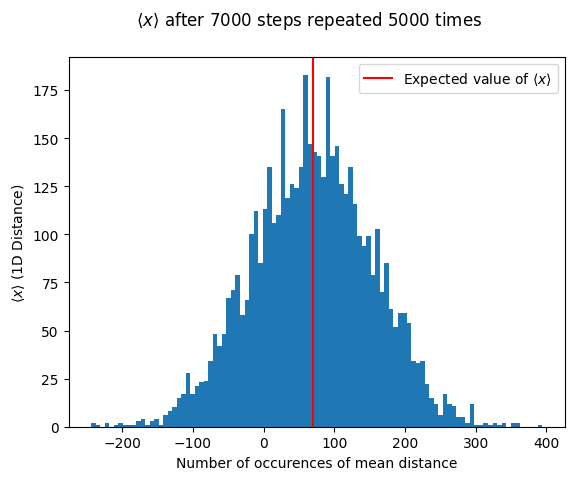

In [10]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Number of occurences of mean distance")
ax.hist(rt2, bins = 100)
ax.set_ylabel(r"$\left<x\right>$ (1D Distance)")
ax.axvline(x=np.mean(rt2), color="red", label = r"Expected value of $\left<x\right>$")
fig.suptitle(r"$\left<x\right>$ after "+str(L)+" steps repeated "+str(n)+" times")
ax.legend()


plt.show()

### Distribution for $L = 8000$

In [11]:
L = 8000
X, Y, r = mov(L)

In [12]:

rt = []
rt2 = []
for _ in N:
  rt2.append(mov(L)[0][-1])

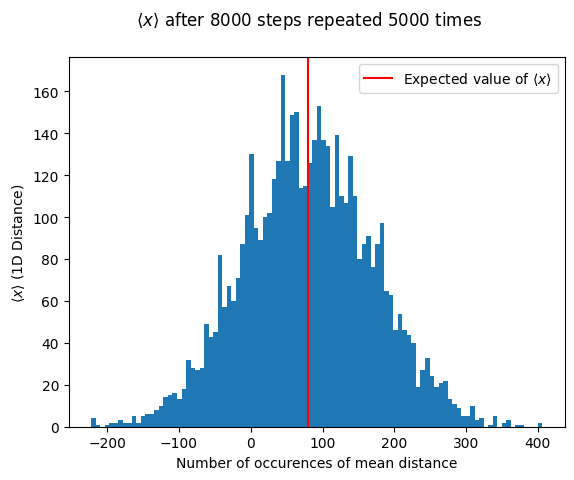

In [13]:
fig, ax = plt.subplots(1)
ax.set_xlabel("Number of occurences of mean distance")
ax.hist(rt2, bins = 100)
ax.set_ylabel(r"$\left<x\right>$ (1D Distance)")
ax.axvline(x=np.mean(rt2), color="red", label = r"Expected value of $\left<x\right>$")
fig.suptitle(r"$\left<x\right>$ after "+str(L)+" steps repeated "+str(n)+" times")
ax.legend()


plt.show()

## 2D Random Walk

For this work, the experiment kept the $N = 5000$ repetitions but since there would have to be sampling for various step cardinalities there had to be enough samples for big enough $L$ to check for convergence without the work as a whole to be too overwhelming for the computer. The result involved the range $L \in \{101,111,\dots, 850\}$

In [14]:
L = [i for i in range(100,850,10)]
l0 = L[0]
# L.remove(l0)
r2 = mov(l0)[-1]**2
meanrt = [r2/l0]

rt = [r2]
for i in L:

  for _ in N:
    r2 = mov(i)[-1]**2
    rt.append(r2)

  nmean = (meanrt[-1] * i + r2)/(i+1)
  meanrt.append(nmean/i)

meanrt.remove(meanrt[-1]) # Removal of extra elements to keep th

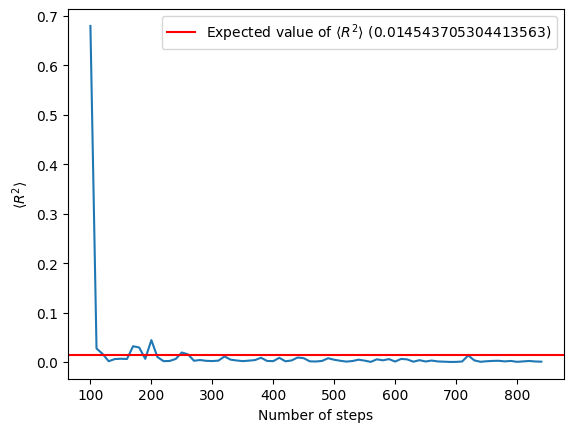

In [15]:

fig, ax = plt.subplots(1)
ax.set_xlabel("Number of steps")
ax.set_ylabel(r"$\left<R^2\right>$")
ax.plot(L,meanrt)
ax.axhline(y=np.mean(meanrt), color='r', linestyle='-', label = r"Expected value of $\left<R^2\right>$ (" + str(np.mean(meanrt)) + ")")
#ax.set_ylim(-1, 1)
ax.legend()
plt.show()

# Closing Remarks



For the 1D case we were able to find convergence for the estimated mean of the distance distribution and the actual mean extracted through experiment, as evidenced by the graphs obtained at various values of increasingly bigger $L$.

Likewise, for the 2D case there was convergence for the constant nature of the relationship previously investigated for increasingly bigger route sizes, obtaining the relationship $\left<R^2\right> \approx 0.01454 L$ for this implementation. There was some low correlation at lower sizes but that was eventually corrected. One must also consider that the approximation used to speed up the process can and inevitably does reduce precision at low values of n. Likewise, the 2D walk implements an approximation for the expected value for $R^2$ which seems to work good enough (i.e. converges for sufficiently large $L$) while improving computation times.

# References

 $[1]. \text{Britannica, T. Editors of Encyclopaedia (2024, November 12). } \textit{Brownian motion}. \text{Encyclopedia Britannica}.$  https://www.britannica.com/science/Brownian-motion.

$[2]. \text{Einstein, A. (1906). } \textit{On the theory of the Brownian movement} \text{. Ann. Phys, 19(4), 371-381.}$

$[3]. \text{Rycroft, C & Bazant, M. (2005). } \textit{Lecture 1: Introduction to Random Walks and Diffusion} \text{. MIT OCW. Website: }$ https://ocw.mit.edu/courses/18-366-random-walks-and-diffusion-fall-2006/resources/lec20/
